In [1]:
from sexpdata import loads, dumps, Symbol
from pathlib import Path
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 


In [2]:
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c',
                  '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f',
                  '#bcbd22', '#17becf']

blue = '#4400FF'
yellow = '#FFD500'
purple = '#e377c2'
red = '#d62728'


sta_color = blue
dyn_color = yellow
bare_color = red

In [3]:
# convert benchmark sexp to a list of dicts
def load_sexp(fname):
    txt = Path(fname).read_text()
    rows = loads(txt)
    rows = [dict((sym.value(),val) for [sym,val] in row) for row in rows]
    rows = dict((row['full_benchmark_name'].value(),row) for row in rows)
    return rows

# display(rows)

ping = load_sexp('../pingpong/results/table_sexp.txt')
bare = load_sexp('../bare_pingpong/results/table_sexp.txt')

sta = [
    ping['ev_static']['time_per_run_nanos'],
    ping['ipc_static:1']['time_per_run_nanos'],
    ping['ipc_static:1000']['time_per_run_nanos'],
]

dyn = [
    ping['ev_dynamic']['time_per_run_nanos'],
    ping['ipc_dynamic:1']['time_per_run_nanos'],
    ping['ipc_dynamic:1000']['time_per_run_nanos'],
]

zero = [
    0.0, 0.0, 0.0
]

bare = [
    bare['lwt_bare_nowrapper']['time_per_run_nanos']
#    bare['lwt_bare']['time_per_run_nanos']
#    bare['lwt_bare_mimic-mpst']['time_per_run_nanos']
]
lwt_dyn = [ping['lwt_dynamic']['time_per_run_nanos']]
lwt_sta = [ping['lwt_static']['time_per_run_nanos']]



In [4]:
def pingpong():
    fig, axes = plt.subplots(1, 2, 
                             gridspec_kw={'width_ratios': [1, 3]},
                             squeeze = False)
    (ax_lwt, ax_evpipe) = axes[0][0], axes[0][1]

    def scale(xs):
        return [x/1000 for x in xs]

    def evpipe():
        width = 0.4
        x = np.arange(3)
        dyn_ = scale(dyn)
        sta_ = scale(sta)
        ax_evpipe.bar(x, dyn_, width*0.8, color=dyn_color, label='Dynamic', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 

        ax_evpipe.bar(x + width, sta_, width*0.8, color=sta_color, label='Static', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 

        # for legends
        ax_evpipe.bar(x + width, zero, width*0.8, color=bare_color, label='Bare', hatch='//') 

        ax_evpipe.set_xticks(x + width/2)
        ax_evpipe.set_xticklabels(['ev', 'p-1', 'p-1000'], fontsize=20)
        legend = ax_evpipe.legend(loc='lower right', shadow=True, fontsize=20)
        legend.get_frame().set_facecolor('#FFFFFF')

    def lwt():
        width = 0.4
        lwt_dyn_ = scale(lwt_dyn)
        lwt_sta_ = scale(lwt_sta)
        bare_ = scale(bare)
        x = np.arange(1)
        ax_lwt.bar(x, lwt_dyn_, width*0.8, color=dyn_color, label='Dyn', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax_lwt.bar(x + width, lwt_sta_, width*0.8, color=sta_color, label='Sta', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax_lwt.bar(x + width*2, bare_, width*0.8, color=bare_color, label='Bare', error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, hatch='//') 
        ax_lwt.set_ylabel('micro sec', fontsize=16) 
        ax_lwt.set_xticks(x+width)
        ax_lwt.set_xticklabels(['lwt'], fontsize=20)
        #ax_lwt.set_ylabel('nano sec', fontsize=16) 

    evpipe()
    lwt()

    fig.suptitle ('Ping Pong', fontsize=16, y=0.98)

    def make_space_above(axes, topmargin=1):
        """ increase figure size to make topmargin (in inches) space for 
            titles, without changing the axes sizes"""
        fig = axes.flatten()[0].figure
        s = fig.subplotpars
        w, h = fig.get_size_inches()

        figh = h - (1-s.top)*h  + topmargin
        fig.subplots_adjust(bottom=s.bottom*h/figh, top=1-topmargin/figh)
        fig.set_figheight(figh)

    plt.tight_layout()
    make_space_above(axes, topmargin=0.4)

    #plt.tight_layout()
    plt.savefig('pingpong.pdf', format='pdf', pad_inches=0)
    plt.show()


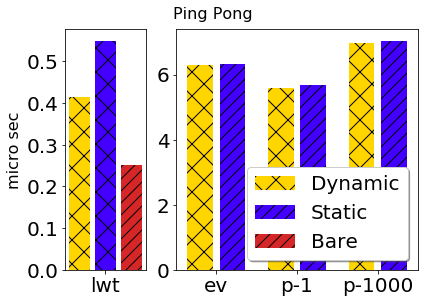

In [5]:
pingpong()